<a href="https://colab.research.google.com/github/wiiloebis/bangkit_machine_learning_assigment/blob/master/Case2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['5,000,000+' '100,000,000+' '100,000+' '10,000,000+' '10,000+'
 '1,000,000+' '50,000,000+' '500,000+' '50,000+' '5,000+' '1,000+'
 '500,000,000+' '1,000,000,000+' '5,000,000,000+' '100+' '500+' '50+' '5+'
 '10+' '1+' 'EDUCATION' '6' '11976' '0+']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 8 columns):
Category           32000 non-null object
Rating             31997 non-null float64
Reviews            31999 non-null float64
Installs           31999 non-null float64
Size               28805 non-null float64
Price              31999 non-null float64
Content_Rating     32000 non-null object
Minimum_Version    32000 non-null object
dtypes: float64(5), object(3)
memory usage: 2.0+ MB
[1.e+05 1.e+07 1.e+04 5.e+06 1.e+06 5.e+05 5.e+04 1.e+08 5.e+03 1.e+03
 5.e+07 1.e+09 5.e+08 1.e+02 5.e+02 5.e+01 5.e+00 1.e+01 1.e+00 0.e+00]
(28802,)
(28802, 7)
[42 3.656329393 1967.0 1.4 0.0 1 27]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28802 ent

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[0.10054102 0.21085368 0.37223916 0.19285614 0.02418808 0.00875637
 0.09056555]


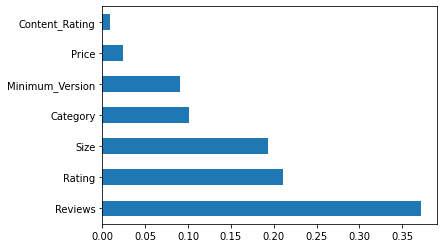

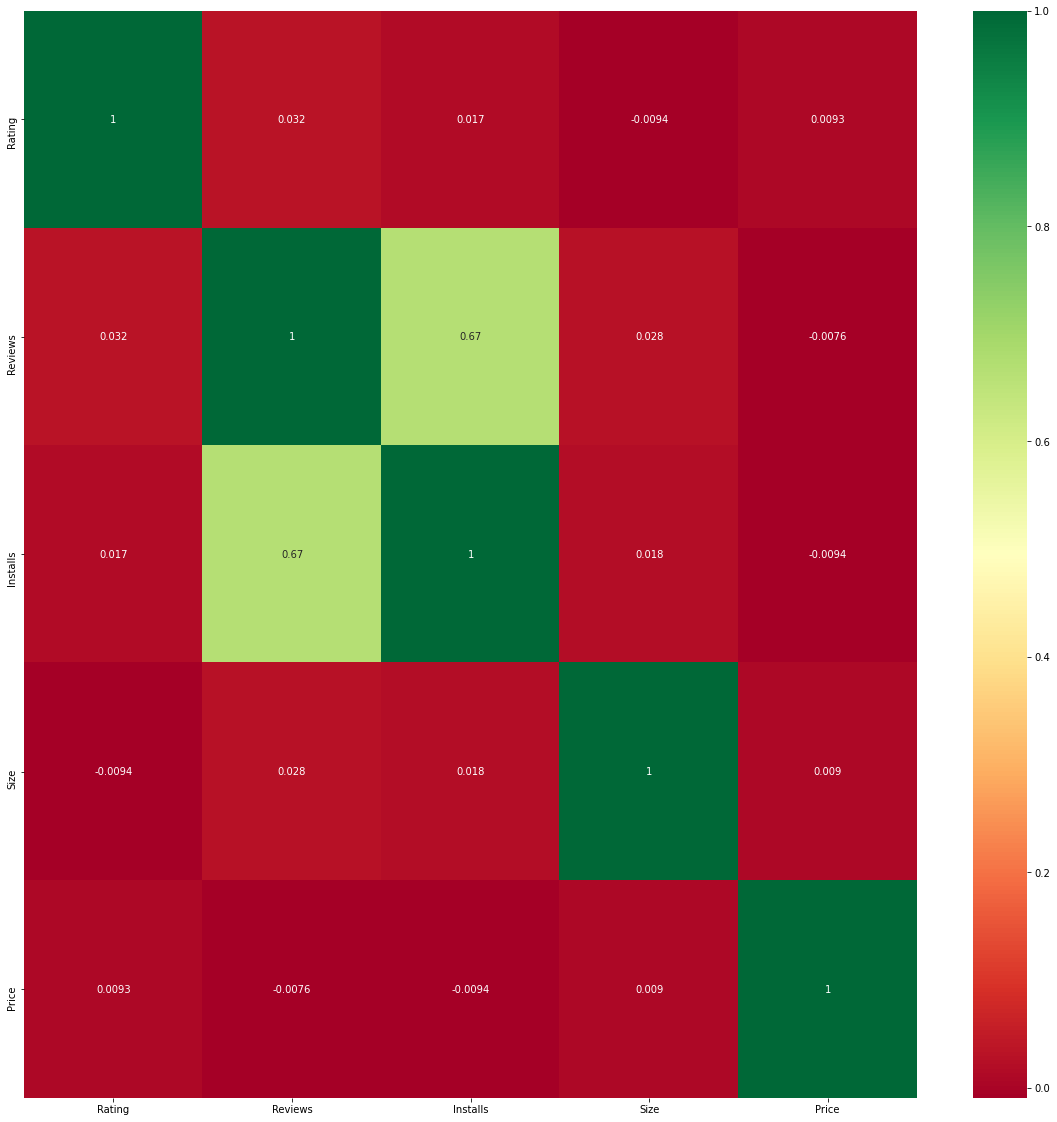

In [39]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('sample_data/Google-Playstore-32K.csv')
#Drop these colums because it's not relevant to be used as feature for data training
#App is just an app name. It has no useful meaning for the training
#Last Updated indicates newest version release date, which means this app already available before
#Current Version indicates current version of the app available in playstore, which means this app already available before
df = df.drop(columns=['App Name', 'Last Updated', 'Latest Version'])
df = df.rename(columns={'Minimum Version': 'Minimum_Version', 'Content Rating': 'Content_Rating'})
print(df.Installs.unique())
string_to_remove = ["+", ",", "M", "$", "k"]
columns = ["Installs","Size", "Price", "Rating"]

# loop over columns that we want to remove a substring from
for col in columns:
    # remove string from columns one by one
    for string in string_to_remove:
        df[col] = df[col].str.replace(string, '')
    # convert the column to numeric
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.info()
df = df.dropna()

print(df.Installs.unique())
X = df.iloc[:, df.columns != 'Installs'].values
Y = df.iloc[:, 3].values
# print(X.shape)
# print(Y.shape)

labelEncoder_Category =  LabelEncoder()
# print(df.Category.unique())
X[:,0] = labelEncoder_Category.fit_transform(X[:,0])
# print(X[:4,:])

# print(df.Minimum_Version.unique())
labelEncoder_MinimumVersion =  LabelEncoder()
# print(X[:4,:])
X[:,6] = labelEncoder_MinimumVersion.fit_transform(X[:,6])
# print(X[:4,:])

# print(df.Rating.unique())
# print(X[:, 1])
# X[:, [1]] = np.vstack(X[:, [1]]).astype(np.float)
# print(X[:10, :])

# print(df.Content_Rating.unique())
labelEncoder_Content_Rating =  LabelEncoder()
# print(X[:10, :])
X[:,5] = labelEncoder_Content_Rating.fit_transform(X[:,5])
# print(X[:10, :])


print(Y.shape)
print(X.shape)
print(X[0,:])
dataframeX = pd.DataFrame(X)
dataframeY = pd.DataFrame(Y)
dataframeX = dataframeX.rename(columns={0: "Category", 1: "Rating", 2: "Reviews", 3: "Size", 4: "Price", 5:"Content_Rating", 6:"Minimum_Version"})
print(dataframeX.info())
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(dataframeX,dataframeY)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataframeX.columns)
# #concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
dataframeX = dataframeX.rename(columns={0: "Category", 1: "Rating", 2: "Reviews", 3: "Size", 4: "Type", 5: "Price", 6:"Content_Rating", 7:"Genres", 8:"Android_Version"})
model.fit(dataframeX,dataframeY)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=dataframeX.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")